# Homework 10 computational problems

## World flags

In this problem you will use the singular value decomposition to investigate a dataset containing 246 different world flags. You will need to download this dataset from ***.

Once downloaded, we can view load an image as a numpy array, and view it using `plt.imshow()`. For example, as given in the below.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

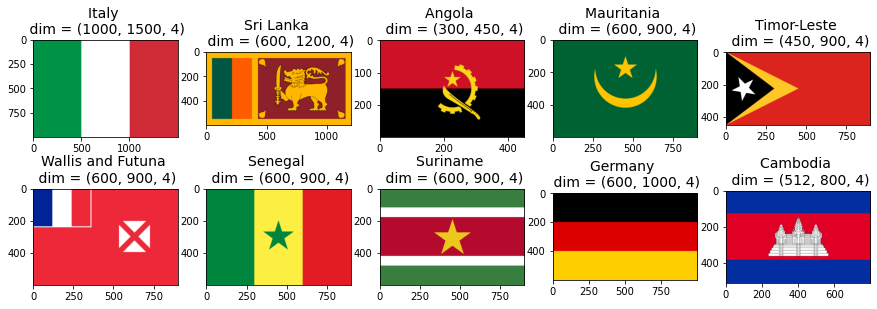

In [68]:
# read the names of the countries from the file country_names.csv
country_names = pd.read_csv('country_names.csv')

# choose 10 random indices 
random_ix = np.random.choice(len(country_names), 10, replace=False)

# set up the 2 x 5 grid for the figure figure
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15,5))
axs = axs.flatten()

# loop over the 10 randomly selected countries (for demonstrative purposes only 
# -- in your code you should investigate all 246 flags
for i, country in enumerate(country_names['country_name'][random_ix]):
    # read the file to a numpy array
    flag = np.load(f'country_flags_npy/{country}.npy')
    
    # plot the flag
    axs[i].imshow(flag)
    axs[i].set_title(f'{country} \n dim = {flag.shape}', fontsize=14)

plt.show()

In [67]:
#read the names of the countries from the file country_names.csv
country_names = pd.read_csv('homework10_files/country_names.csv')

# choose 10 random indices 
random_ix = np.random.choice(len(country_names), 50, replace=False)
names = country_names['country_name'][random_ix].tolist()

for name in names:
    print(name)
    flag = np.load(f'homework10_files/country_flags_npy/{name}.npy')
    np.save(f'country_flags_npy/{name}.npy', flag)
    
pd.DataFrame({'country_name': names}).to_csv('country_names.csv')

# # set up the 2 x 5 grid for the figure figure
# fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15,5))
# axs = axs.flatten()

# # loop over the 10 randomly selected countries (for demonstrative purposes only 
# # -- in your code you should investigate all 246 flags
# for i, country in enumerate(country_names['country_name'][random_ix]):
#     # read the file to a numpy array
#     flag = np.load(f'country_flags_npy/{country}.npy')
    
#     # plot the flag
#     axs[i].imshow(flag)
#     axs[i].set_title(f'{country} \n dim = {flag.shape}', fontsize=14)

# plt.show()

Kiribati
Somalia
Georgia
Malaysia
Wallis and Futuna
Italy
Germany
Bosnia and Herzegovina
Romania
Turks and Caicos Islands
Sint Maarten (Dutch part)
Jordan
Timor-Leste
Bangladesh
Maldives
Cayman Islands
Poland
Guinea
Fiji
Eritrea
Lithuania
Gibraltar
Mongolia
Bahrain
Congo - the Democratic Republic of the
Russian Federation
Mauritania
Suriname
Senegal
Mali
Tokelau
Botswana
Ethiopia
Costa Rica
Finland
Saint Kitts and Nevis
Cook Islands
Pitcairn
Cambodia
Macao
Chad
Faroe Islands
Paraguay
Angola
Montserrat
Virgin Islands - U.S.
Saint Vincent and the Grenadines
Singapore
Bahamas
Sri Lanka


These flags are stored as RBGA images, which means the have 4 "channels", corresponding to different color hues. To make things a bit simpler, we will average across these 4 channels to obtain grayscale versions of the flags. 

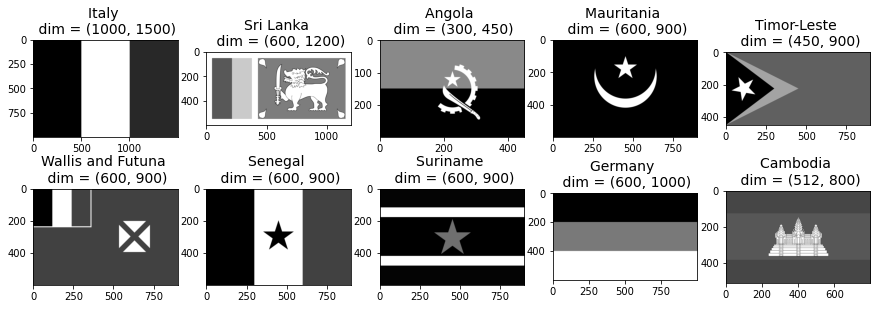

In [69]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15,5))
axs = axs.flatten()

for i, country in enumerate(country_names['country_name'][random_ix]):
    flag = np.load(f'country_flags_npy/{country}.npy')
    
    # take the average over the last axis to convert to grayscale
    flag = np.mean(flag, axis=2)
    axs[i].imshow(flag, cmap='gray')
    axs[i].set_title(f'{country} \n dim = {flag.shape}', fontsize=14)

plt.show()

Now the flags are stored as matrices of varying dimension. In this problem, we will investigate ways of analyzing a manipulating these flags using the Singular Value Decomposition.

### Part 1: Ranking country flags by rank

One way to measure the "complexity" of a flag is to measure its _rank_. One way to calculate the rank of a given matrix is to count its number of nonzero singular values. For each of the flags (do this is a for loop so you don't store all the flags in memory at once), perform the following:

1. Compute its singular value decomposition $U\Sigma V^\top$ using the numpy function `np.linalg.svg(flag)`
2. Count the number of nonzero of singular values to determine the flags rank. You should consider a singular value equal to zero if it is below some small threshold, say `1e-5`
3. Report the countries with the 5 lowest ranks and the countries with the 5 highest ranks (there may be ties, so just pick 5 from these)

What do you notice about the most complicated (highest rank) flags? What do you notice about the lowest rank ones?

Note: when you read the files in, make sure the convert them to grayscale before performing the SVD as we did in the example above.

**It may take a long time to do this for all 246 flags, depending on your machine. If you'd like you can do this for some reasonably sized subset of the flags, say 30-50 of them**.

In [70]:
### SOLUTION

names = []
ranks = []

eps = 1e-5

# choose 30 random indices 
random_ix = np.random.choice(len(country_names), 30, replace=False)

for i, country in enumerate(country_names['country_name'][random_ix]):
    flag = np.load(f'country_flags_npy/{country}.npy')
    
    # take the average over the last axis to convert to grayscale
    flag = np.mean(flag, axis=2)
    _, s, _ = np.linalg.svd(flag)
    ranks.append(len(s[s>eps]))
    names.append(country)
    
data = pd.DataFrame({'country': names, 'rank': ranks}).sort_values('rank')
data

FileNotFoundError: [Errno 2] No such file or directory: 'country_flags_npy/Suriname.npy'

### Part 2: rank one flags

**(a)** You should notice in your ranking at least one flag which has rank 1. For this flag, find two vectors $u$ and $v$ such that this flag is equal to $uv^\top$, and verify by plotting $uv^\top$ that this does indeed represent the original flag. Inspect the vectors $u$ and $v$ -- what do you notice about them? Intuitively how is this related to the image of this particular flag?

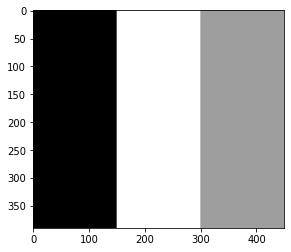

In [50]:
## SOLUTION

flag = np.load(f'country_flags_npy/Belgium.npy')
flag = np.mean(flag, axis=2)
U, S, Vt = np.linalg.svd(flag)
u = np.sqrt(S[0])*U[:,0]
v = np.sqrt(S[0])*Vt[0].T
flag2 = np.outer(u, v)
plt.imshow(flag2, cmap='gray')

**(b)** For the sample flag you obtained in part (a), find a way to use the vectors $u$ and $v$ to resize the matrix by a factor of 2 -- i.e. if the matrix is originally $m\times n$, create a new matrix that looks the same when plotted, but is of dimension $(2m)\times (2n)$.

### Part 3: approximating complex flags with low rank matrices

Next, take the most complex -- i.e. highest rank -- flag you found in Part 1, and compute its singular value decomposition $U\Sigma V^\top$. For each value of $k \in \{5,10,30,50,100,200\}$, use the SVD to find the best rank $k$ approximation to the original flag, and plot it. At what value of $k$ does the approximated flag begin to resemble the original flag well? For the lower rank approximations, what do you notice is missing from the flag?

(900, 1800)
(900,) (1800,)


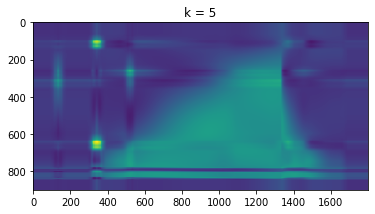

(900,) (1800,)


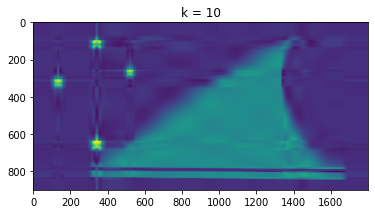

(900,) (1800,)


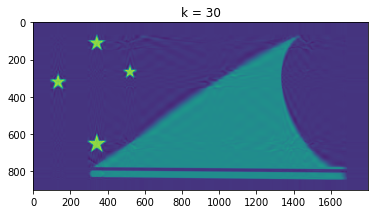

(900,) (1800,)


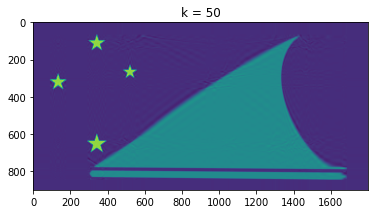

(900,) (1800,)


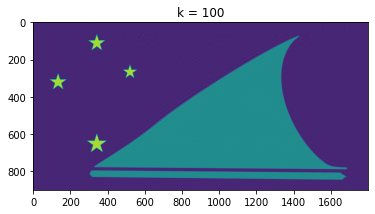

(900,) (1800,)


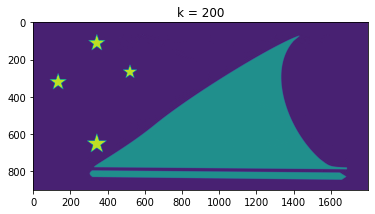

In [55]:
## SOLUTION 

flag = np.load(f'country_flags_npy/Tokelau.npy')
flag = np.mean(flag, axis=2)

U, S, Vt = np.linalg.svd(flag)
print(flag.shape)
for k in [5,10,30,50,100,200]:
    print(U[:,0].shape, Vt.T[:,0].shape)
    approx = np.sum(np.array([np.outer(U[:,i], Vt.T[:,i])*S[i] for i in range(k)]), axis=0)
    plt.imshow(approx)
    plt.title('k = %s' % k)
    plt.show()